In [1]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1, TGraphErrors
from ROOT import gStyle
from array import array
import math
import numpy as np

c1 = TCanvas( 'c1', 'Fitting Example with Errors', 200, 10, 700, 500 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

Welcome to JupyROOT 6.28/04


In [2]:
def generator_function(x,par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

def generator_function_root(x,par):
    return par[0]+par[1]*x[0]+par[2]*x[0]*x[0]+par[3]*x[0]*x[0]*x[0]

par = array('d')
par.append(1.80)
par.append(-4.05)
par.append(0.40)
par.append(1.0000)

In [3]:
gStyle.SetOptFit(1)
m = 3 #Set the order of the polynomial
n = 15 #Set the number of data points
walk = array('d')
walk = [-1,1,-.5,.5,0,-1,1,-.5,.5,0,-1,1,-.5,.5,0]
sigma = array('d')
sigma = [1,1,1,2,2,2,1,1,1,3,3,3,1,1,1]

In [4]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

In [5]:
for i in range(0,n):
    x.append(-4.0+8.0*i/n)
    y.append(generator_function(x[i],par)+0.5*walk[i])
    ex.append(0.0)
    ey.append(sigma[i])

In [6]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [7]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("Cofactor matrix:")
print (a)
print ("Constant matrix:")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("Inverse matrix")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
print (coeff)
        

Cofactor matrix:
[[ 1.00833333e+01 -3.35555556e+00  6.71980247e+01 -5.53197037e+01]
 [-3.35555556e+00  6.71980247e+01 -5.53197037e+01  7.40389785e+02]
 [ 6.71980247e+01 -5.53197037e+01  7.40389785e+02 -9.68304626e+02]
 [-5.53197037e+01  7.40389785e+02 -9.68304626e+02  9.09794484e+03]]
Constant matrix:
[[ 3.48700617e+00]
 [ 4.40982867e+02]
 [-3.30025986e+02]
 [ 5.63221737e+03]]
Inverse matrix
[[ 0.27431292  0.05019039 -0.02823758 -0.0054219 ]
 [ 0.05019039  0.17365438 -0.01122607 -0.0150216 ]
 [-0.02823758 -0.01122607  0.00469904  0.001242  ]
 [-0.0054219  -0.0150216   0.001242    0.00143159]]
Diagonal Check:
[[ 1.00000000e+00  4.12100377e-16 -1.54404997e-16 -1.99010346e-17]
 [-1.23625986e-15  1.00000000e+00  1.81464793e-16  2.68557373e-16]
 [ 1.24460858e-15  5.01304535e-16  1.00000000e+00  4.05384769e-17]
 [-6.62107437e-15 -2.41144358e-14  3.07108591e-16  1.00000000e+00]]
Coefficients:
[[ 1.87146382]
 [-4.14638851]
 [ 0.39545786]
 [ 1.00996585]]


In [8]:
yfit = 0
error_sum = 0
for j in range(0,n):
    for k in range(0,m+1):
        yfit = yfit + coeff[k]*math.pow(x[j],k)
    print ("i = %d  y = %f  yfit = %f" % (j,y[j],yfit))
    error_sum = error_sum + math.pow(((yfit-y[j])/ey[j]),2)
    yfit = 0
    
chi2 = error_sum/(n-m)
print ("chi2/dof = %f / %f" % (error_sum,(n-m-1)))

i = 0  y = -40.100000  yfit = -39.853471
i = 1  y = -20.514519  yfit = -21.078688
i = 2  y = -8.367926  yfit = -8.054340
i = 3  y = 0.250000  yfit = 0.138866
i = 4  y = 4.249481  yfit = 4.420223
i = 5  y = 5.040741  yfit = 5.709025
i = 6  y = 5.284000  yfit = 4.924565
i = 7  y = 2.639481  yfit = 2.986137
i = 8  y = 1.017407  yfit = 0.813034
i = 9  y = -0.672000  yfit = -0.675451
i = 10  y = -1.018519  yfit = -0.560025
i = 11  y = 2.638074  yfit = 2.078607
i = 12  y = 7.958000  yfit = 8.159737
i = 13  y = 18.851481  yfit = 18.602658
i = 14  y = 34.228741  yfit = 34.326665
chi2/dof = 1.060895 / 11.000000


/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_5167/2015070024.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("i = %d  y = %f  yfit = %f" % (j,y[j],yfit))
/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_5167/2015070024.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error_sum = error_sum + math.pow(((yfit-y[j])/ey[j]),2)


In [9]:
print ("Coefficients with Errors:")
for k in range(0,m+1):
    print("p%d = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))

Coefficients with Errors:
p0 = 1.871464 +/- 0.523749
p1 = -4.146389 +/- 0.416719
p2 = 0.395458 +/- 0.068550
p3 = 1.009966 +/- 0.037836


/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_5167/3746815851.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("p%d = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))


pol3
Fit 1: 1.060895 11.000000 



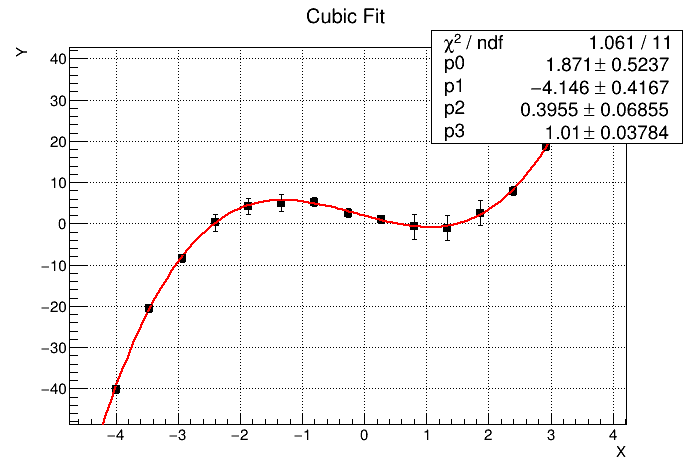

In [10]:
poltype = "pol"+str(m)
print (poltype)
gr = TGraphErrors(n,x,y,ex,ey)
pfit1 = TF1("pfit1",poltype)
pfit2 = TF1("pfit2",generator_function_root,-5.0,5.0,4)
gr.SetMarkerStyle(21)
gr.SetTitle("Cubic Fit")
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Y")
gr.Fit("pfit1","q")
gr.Fit("pfit2","q")
pfit1chi2 = pfit2.GetChisquare()
pfit1ndf = pfit2.GetNDF()
pfit1chi2ndf = pfit1chi2/pfit1ndf
print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
gr.Draw("AP")
c1.Draw()